## Analise de ações da bolsa de valores, usando dados do Yahoo Finance

Install Packages

In [4]:
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install numpy

Importar as Bibliotecas

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
from dateutil.relativedelta import relativedelta

Função para baixar os dados do Yahoo Finance

In [6]:
def obter_dados(ticker, start_date,end_date):
    data = pd.DataFrame(yf.download(ticker,start=start_date, end=end_date))
    # Resetando o índice para transformar o índice 'Date' em uma coluna
    data.reset_index(inplace=True)

    return data

Função para criar os gráficos 

In [7]:
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Open'].values
    n = np.size(data['Open'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Low'].values
    n = np.size(data['Low'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[1].plot(data['Low'], label='Minima', color='green')
    axs[1].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['High'].values
    n = np.size(data['High'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

Função para Gráficos comparativo

In [94]:
def plotar_graficos_comparativos(dados):
    
    tickers = []
    plt.figure(figsize=(10,6))

    for dado in dados:
        X = (dado['Date'] - dado['Date'].min()).dt.days.values
        Y = (dado['Close'])
        plt.plot(X,Y)
        tickers.append(dado)
        plt.grid()


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Define Ticker, data de inicio, data de fim e mandar rodar a função para buscar os dados e plotar no gráfico

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


******************************************************************
******************************************************************
Ação: VALE
Datas entre: 2019-10-23 e 2024-10-23


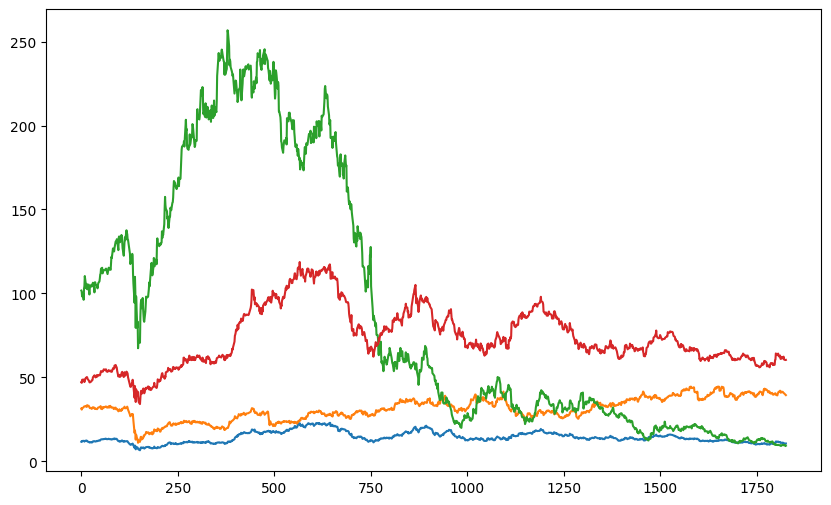

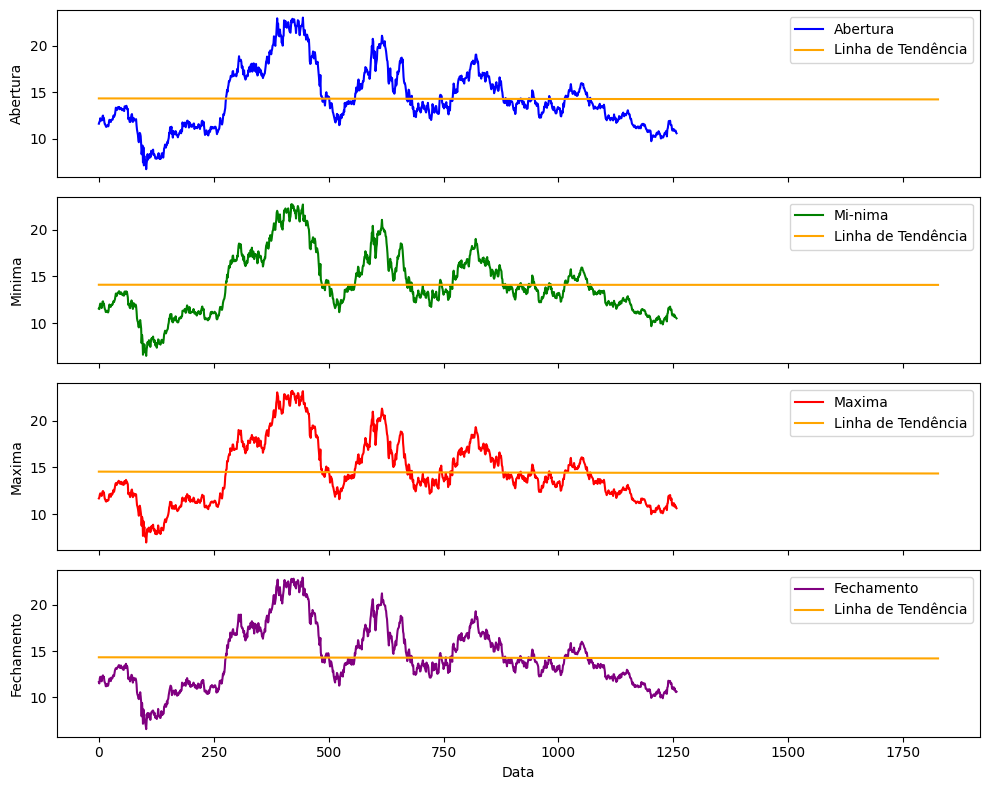

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: PETR3.SA
Datas entre: 2019-10-23 e 2024-10-23


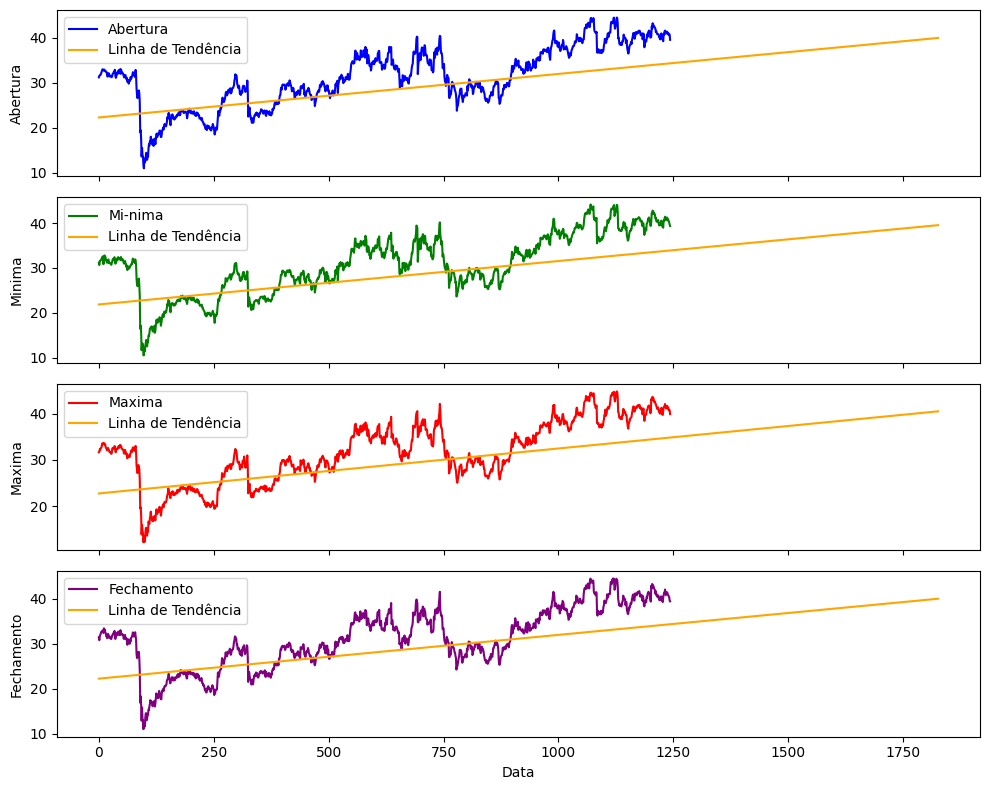

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: MGLU3.SA
Datas entre: 2019-10-23 e 2024-10-23


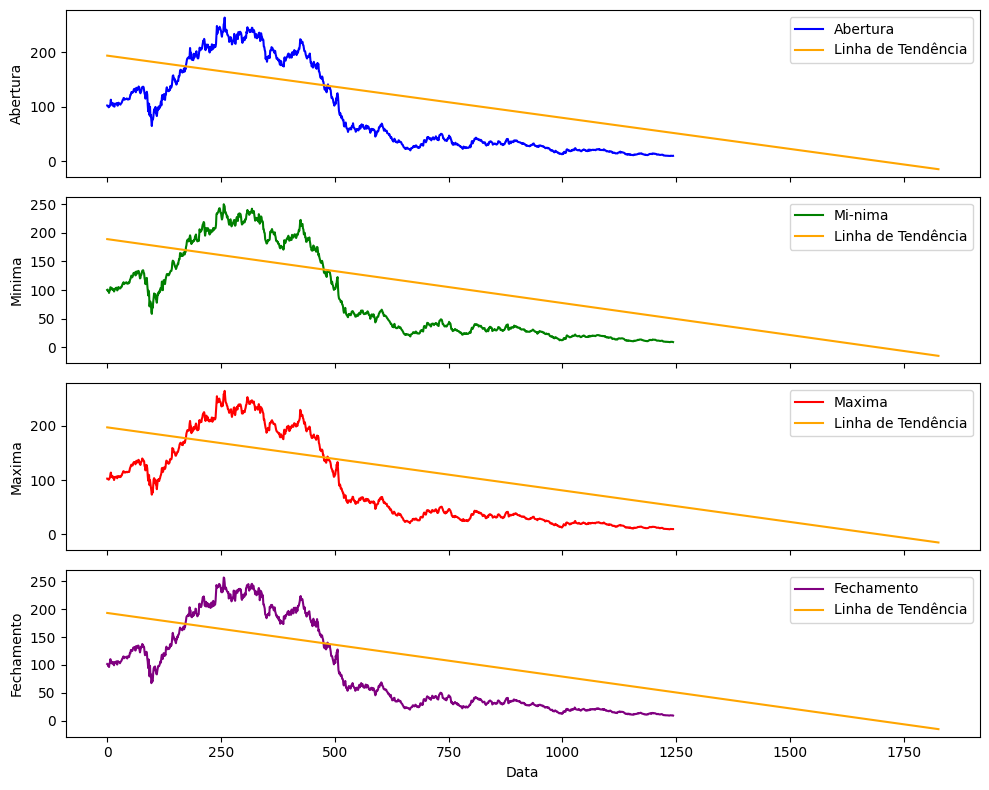

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: VALE3.SA
Datas entre: 2019-10-23 e 2024-10-23


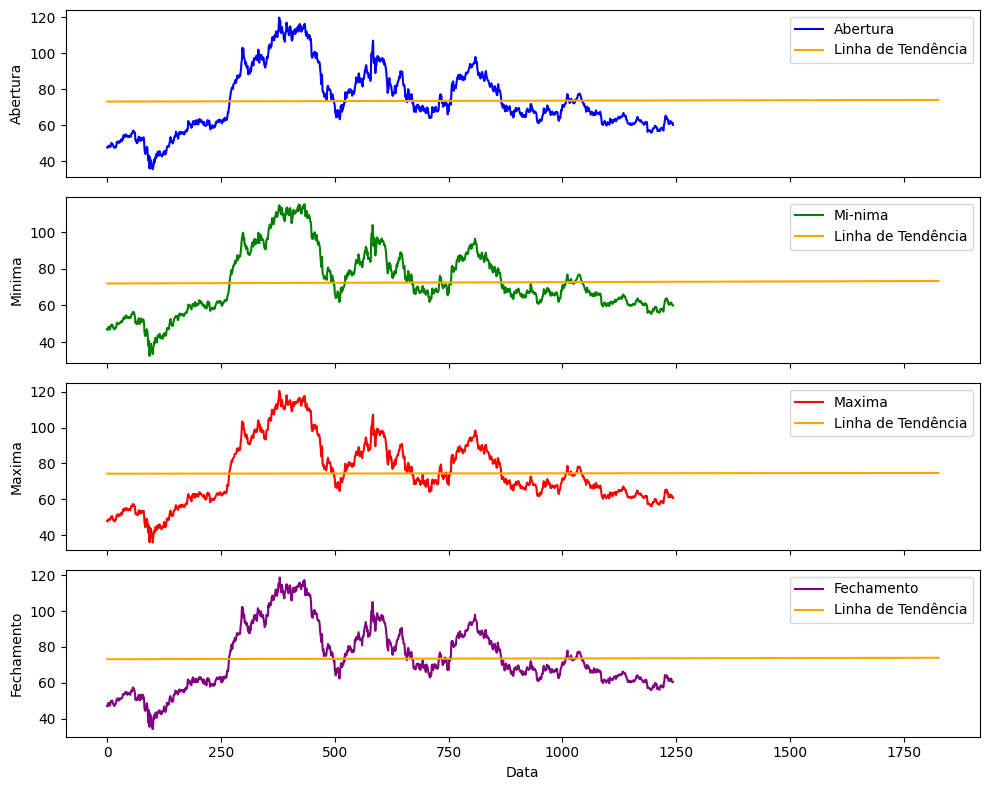

******************************************************************


In [100]:
# recebe valor com nome das ações do usuario
inputTickers = input("Entre com os nome das ações separadas por virgura, ex: PETR3.SA,MGLU3.SA,VALE3.SA")
# recebe a quantidade de anos que deseja buscar
inputYear = input("Entre com tempo em anos do período da busca")

# cria uma lista com os valores recebidos
if len(inputTickers) > 0:
    tickers =  [valor.strip().upper() for valor in inputTickers.split(',') ] 
else:
    # caso o valor for em branco, entrão recebe valor padrão
    tickers = ["VALE","PETR3.SA","MGLU3.SA","VALE3.SA"]

# Data de término é sempre a data atual
end_date = today = datetime.date.today()

# verifica se teve data de início
if len(inputYear) > 0:
    start_date = end_date - relativedelta(years=int(inputYear))
else:
    # se receber valor em branco, então busca o valor padrão
    start_date = end_date - relativedelta(years=3)

# cria uma tabela para receber os dados
dados = []

# Faz a busca dos dados no servidor da Yahoo e adiciona na tabela
for ticker in tickers:
    dados.append(obter_dados(ticker,start_date,end_date))

# plota os dados 
print('******************************************************************')
plotar_graficos_comparativos(dados)

# Chamando a função do Yahoo Finance
for ticker in tickers:
    dados = obter_dados(ticker,start_date,end_date)
    print('******************************************************************')
    print(f'Ação: {ticker}') 
    print(f'Datas entre: {start_date} e {end_date}')
    plotar_graficos(dados)
    print('******************************************************************')

[*********************100%***********************]  1 of 1 completed


******************************************************************
Ação: PETR4.SA
Datas entre: 2024-01-01 e 2024-10-23


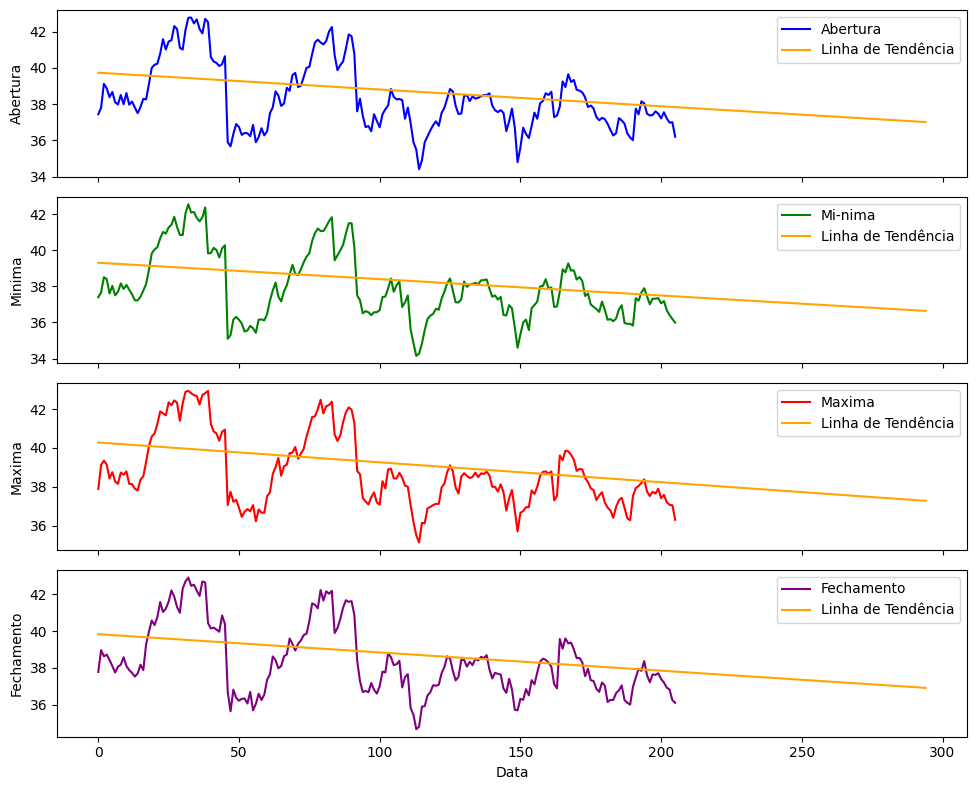

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: VALE3.SA
Datas entre: 2024-01-01 e 2024-10-23


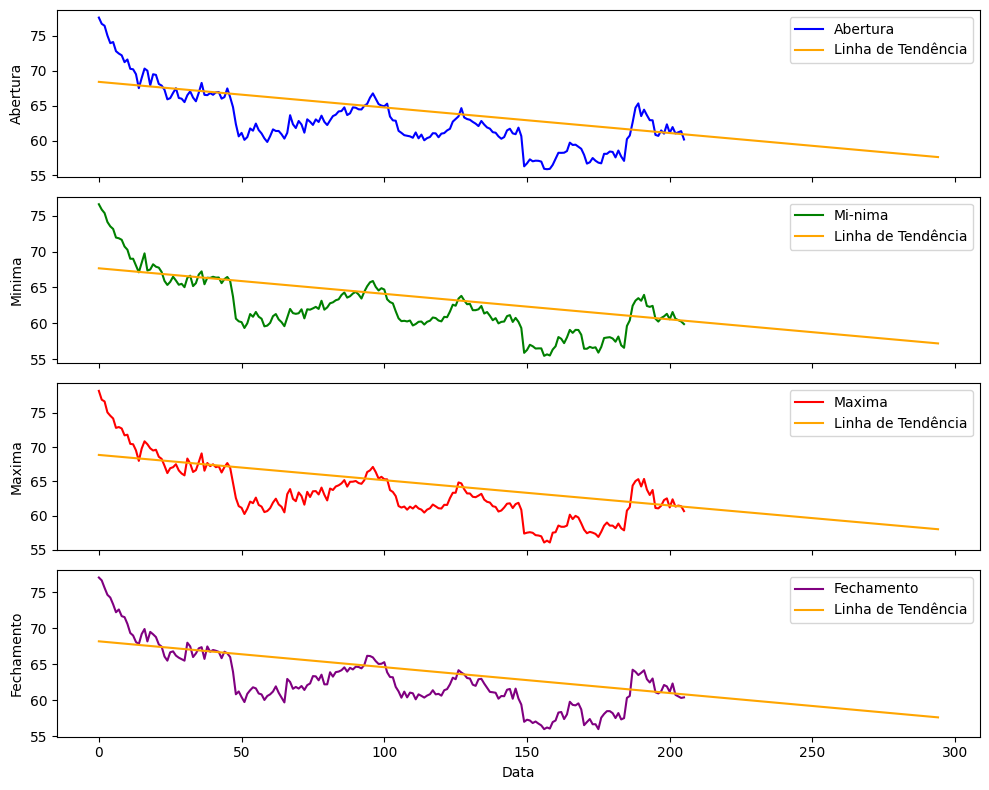

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: ITUB4.SA
Datas entre: 2024-01-01 e 2024-10-23


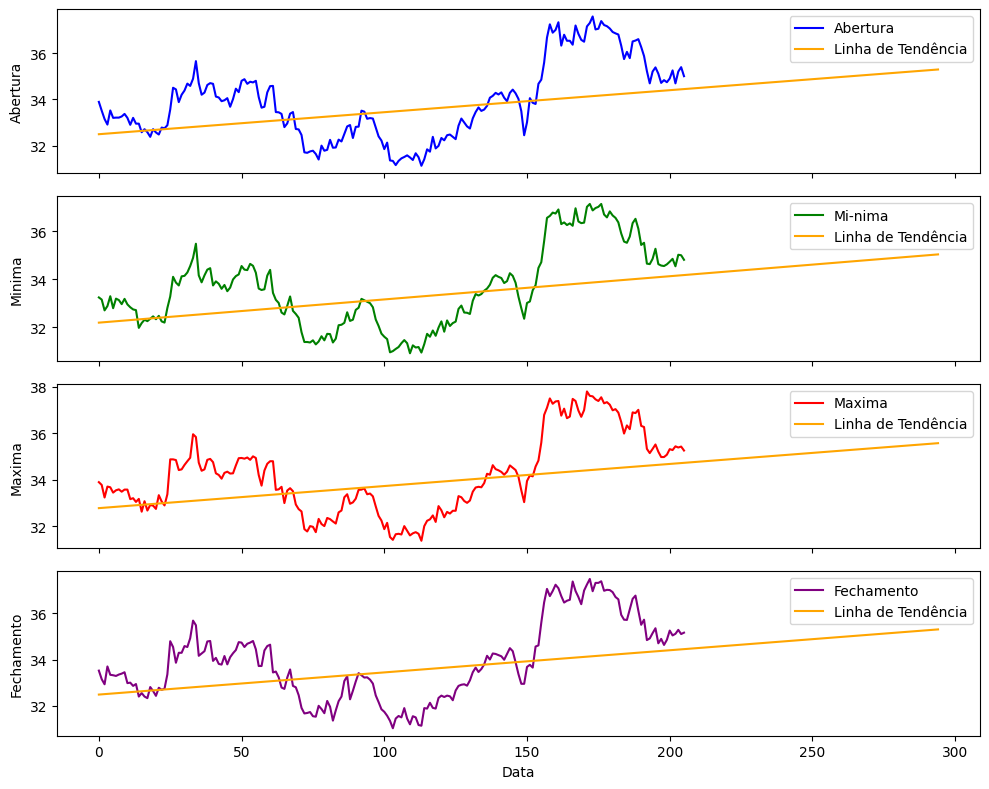

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: BBDC4.SA
Datas entre: 2024-01-01 e 2024-10-23


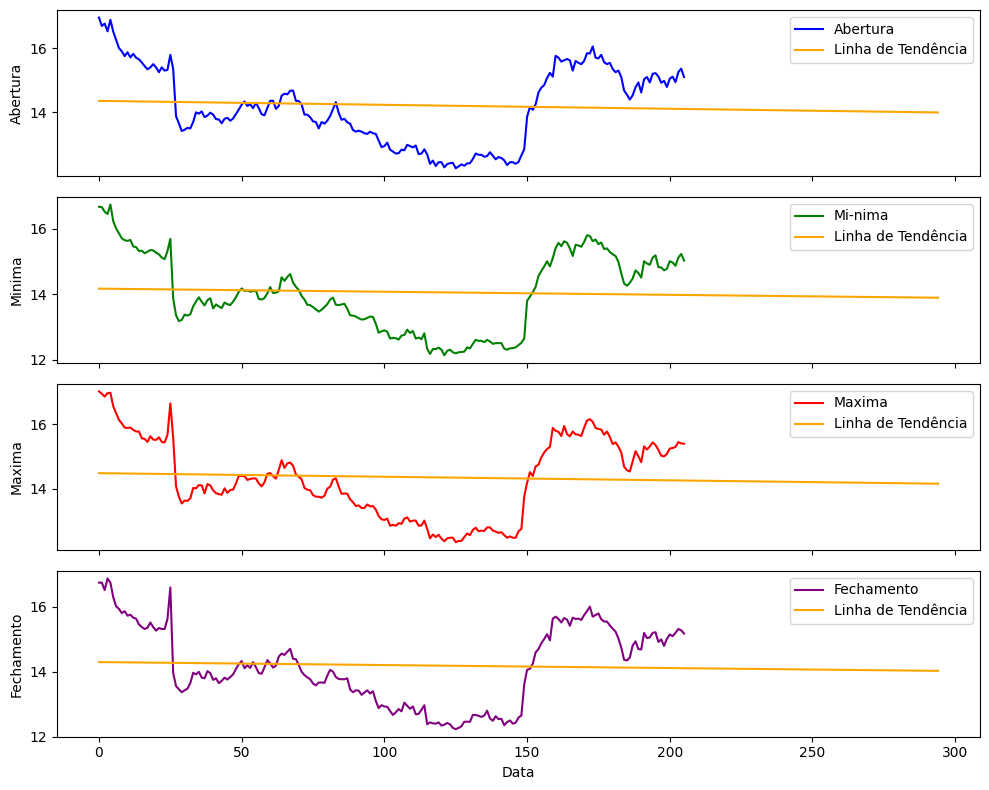

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: ABEV3.SA
Datas entre: 2024-01-01 e 2024-10-23


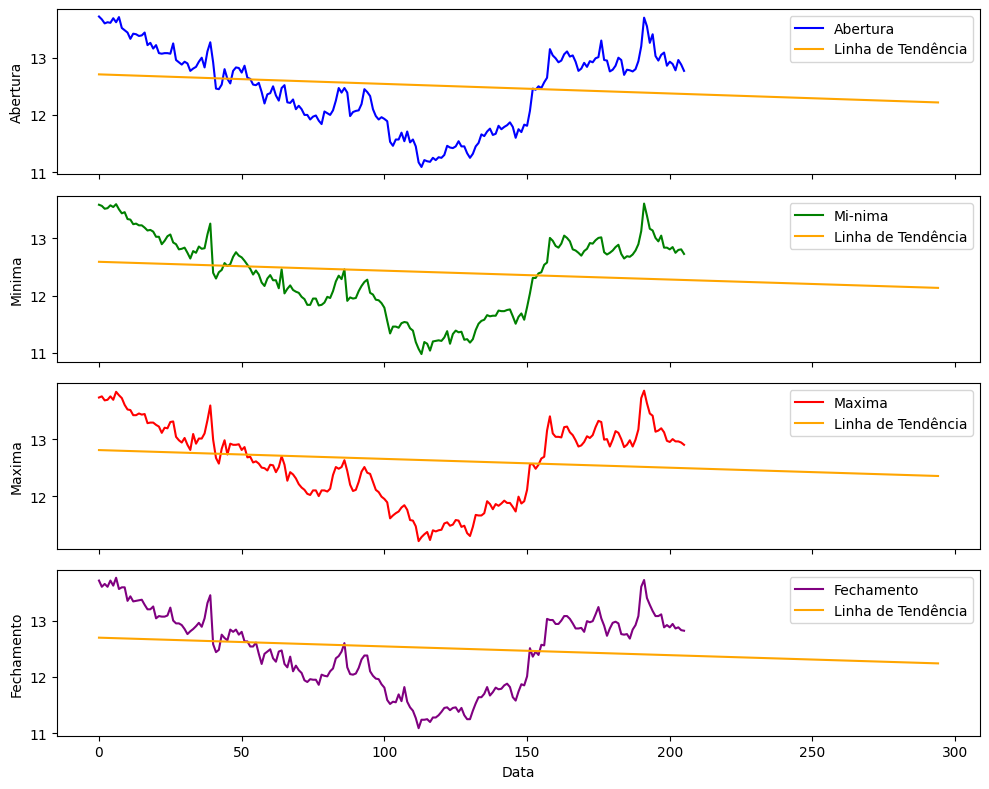

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: BBAS3.SA
Datas entre: 2024-01-01 e 2024-10-23


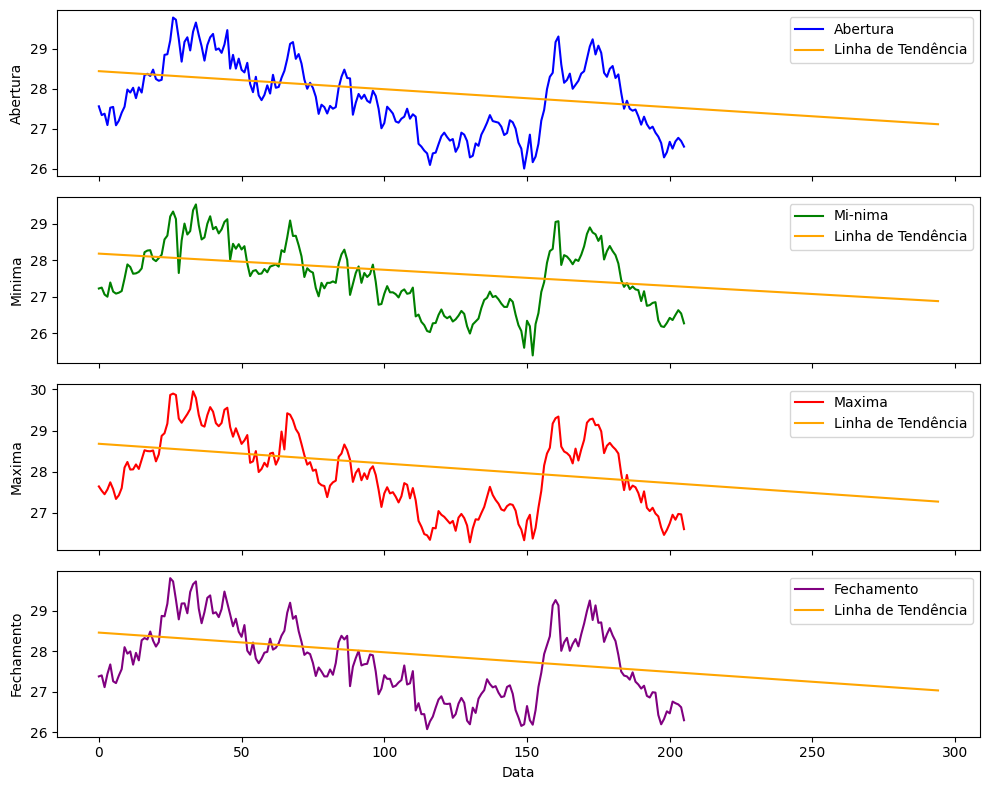

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: WEGE3.SA
Datas entre: 2024-01-01 e 2024-10-23


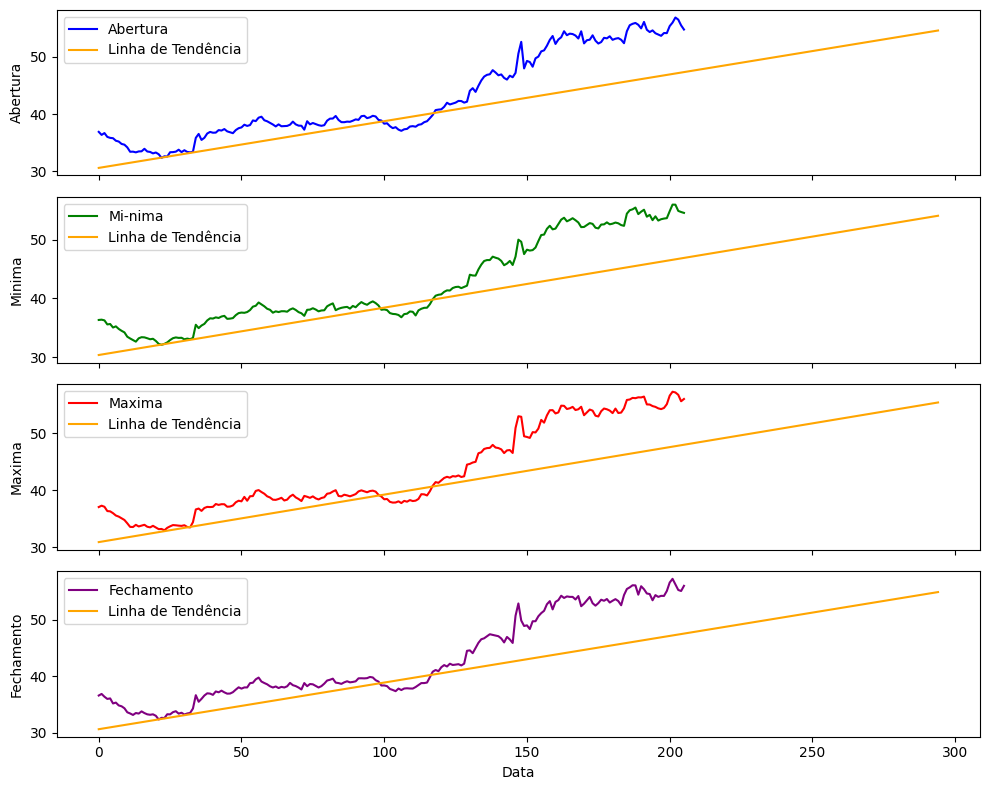

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: MGLU3.SA
Datas entre: 2024-01-01 e 2024-10-23


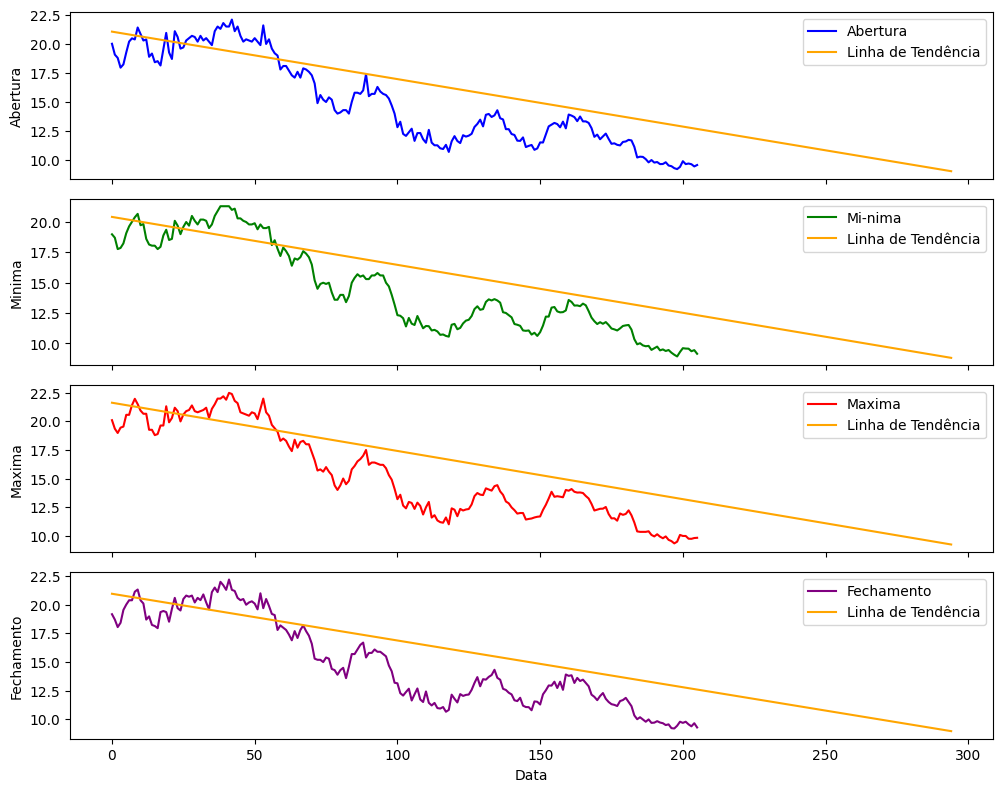

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: B3SA3.SA
Datas entre: 2024-01-01 e 2024-10-23


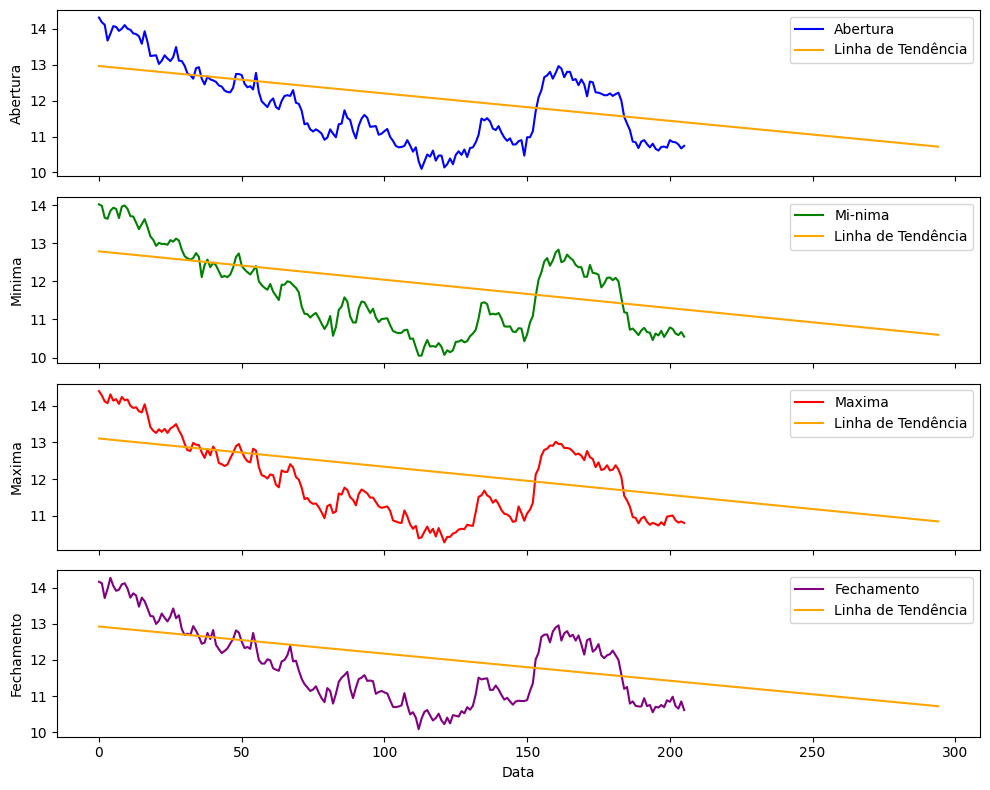

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: GGBR4.SA
Datas entre: 2024-01-01 e 2024-10-23


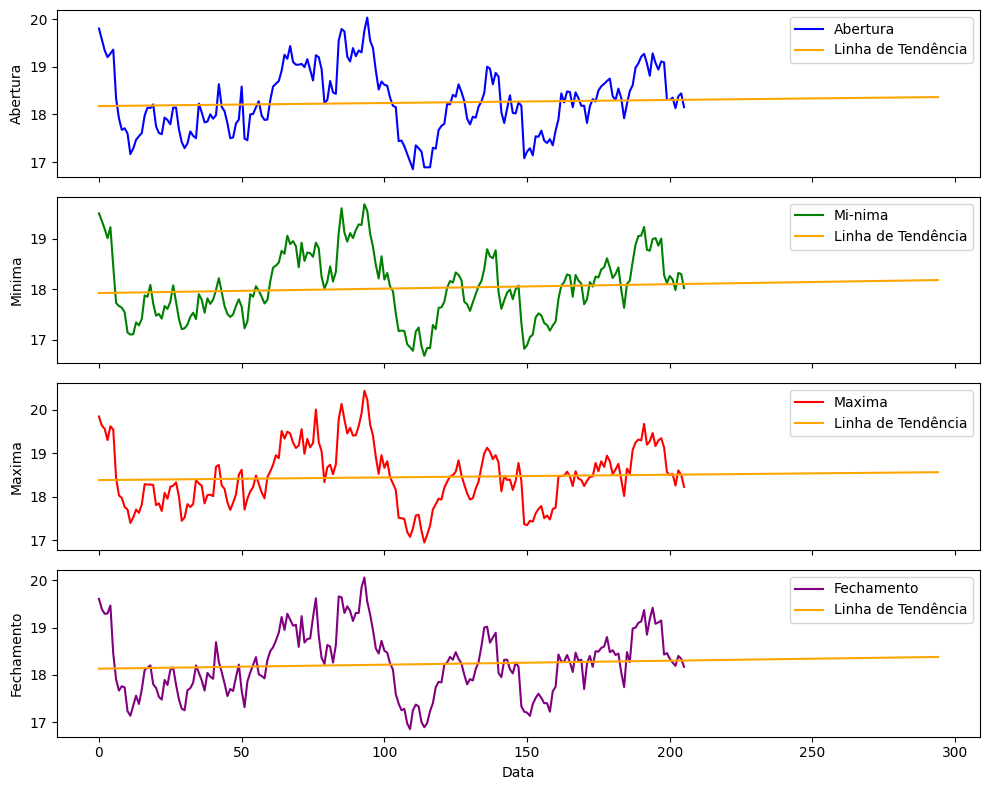

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: JBSS3.SA
Datas entre: 2024-01-01 e 2024-10-23


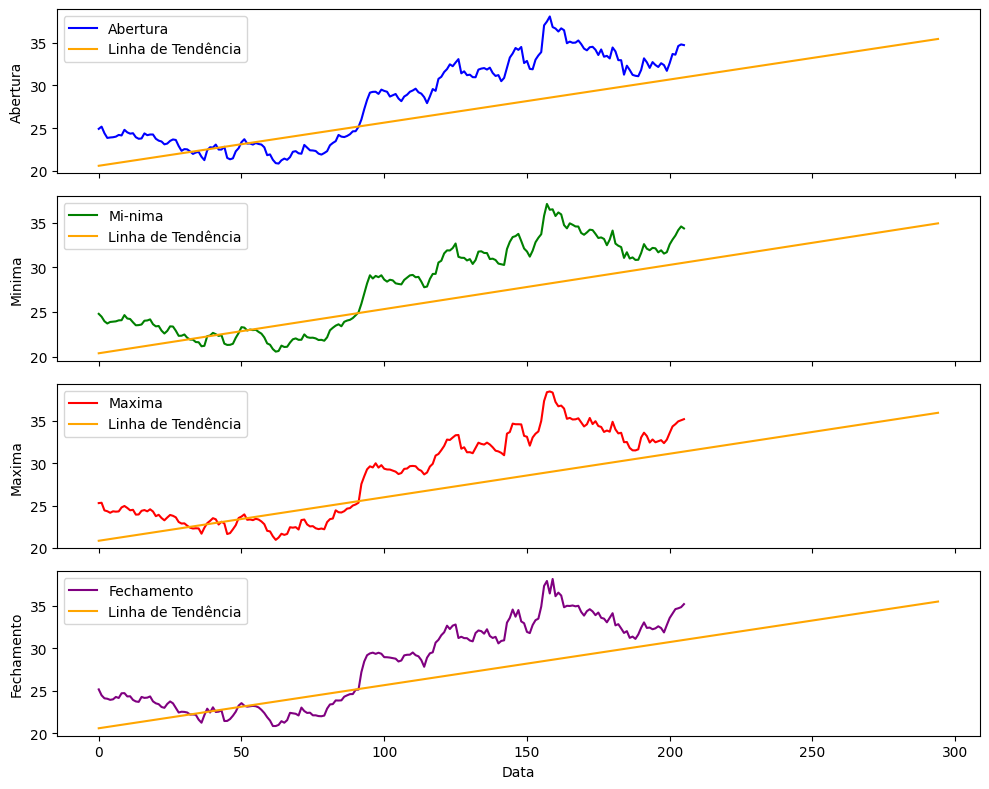

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: ELET3.SA
Datas entre: 2024-01-01 e 2024-10-23


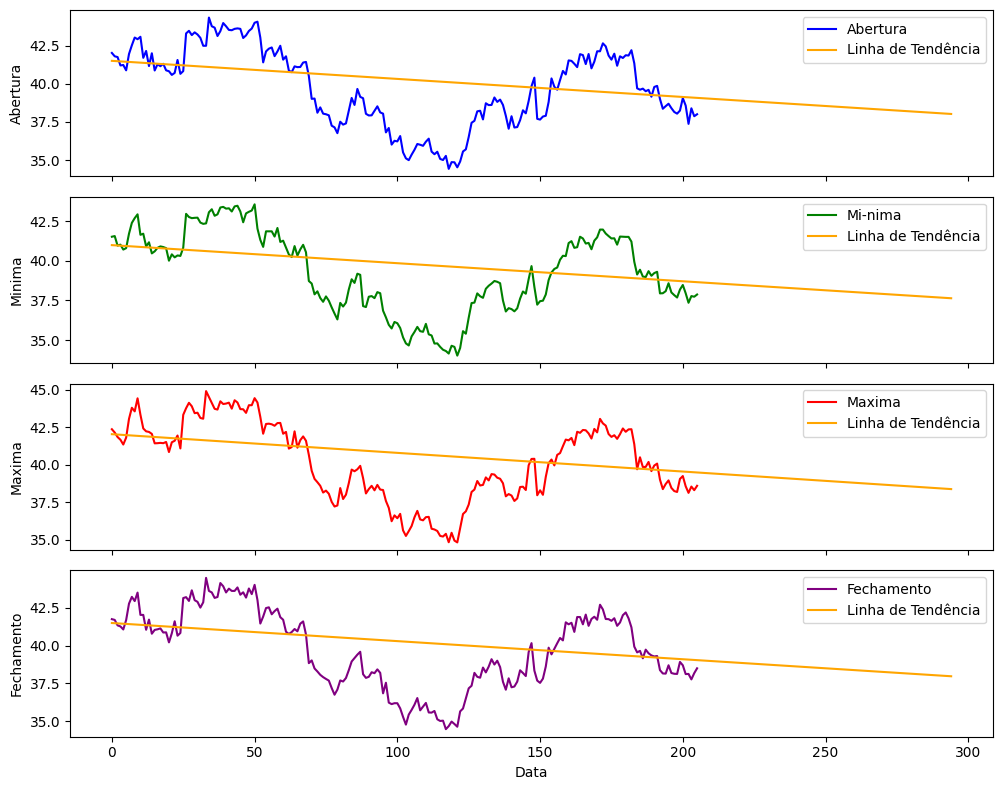

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: BBDC3.SA
Datas entre: 2024-01-01 e 2024-10-23


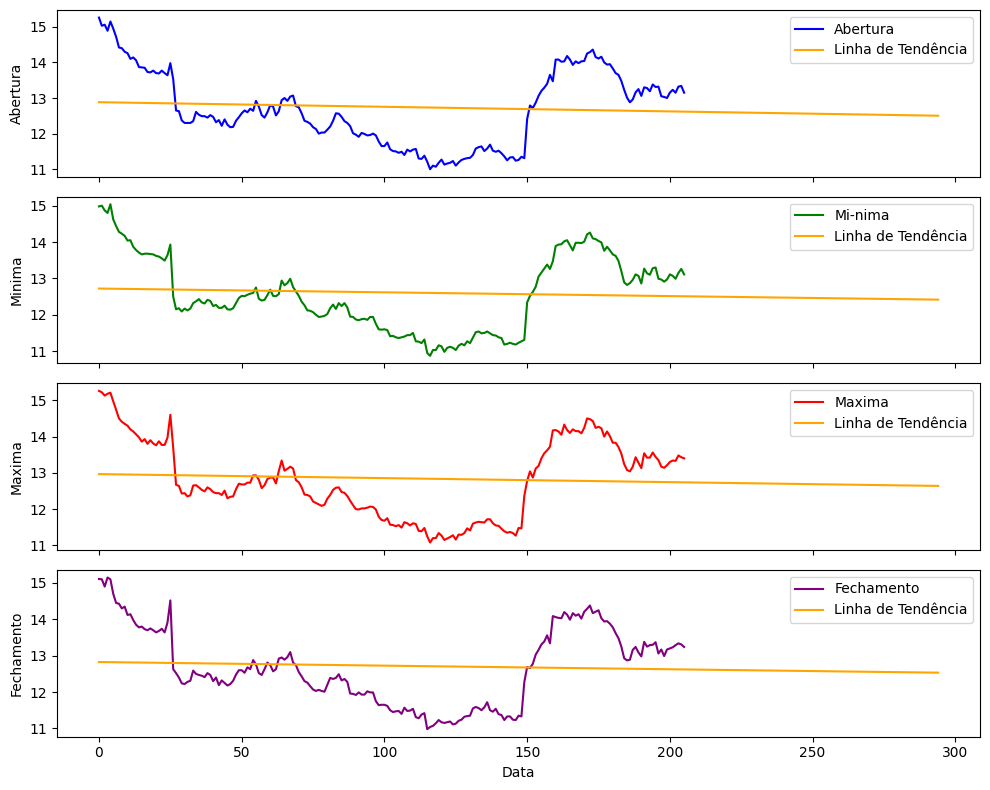

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: ITSA4.SA
Datas entre: 2024-01-01 e 2024-10-23


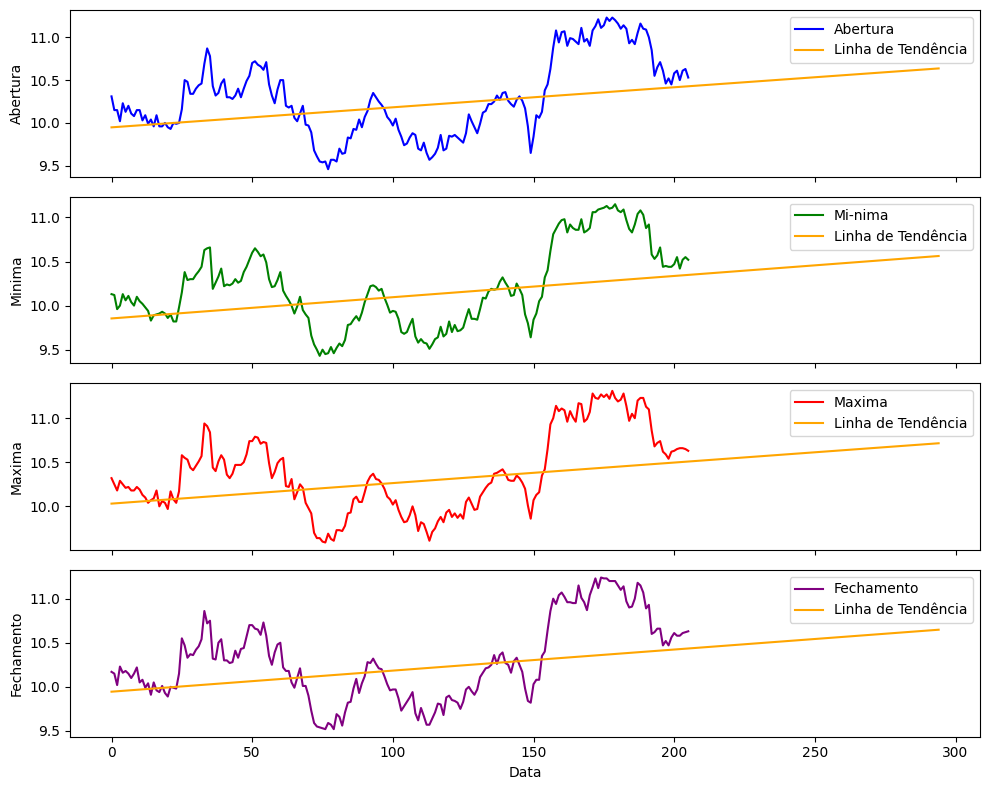

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: LREN3.SA
Datas entre: 2024-01-01 e 2024-10-23


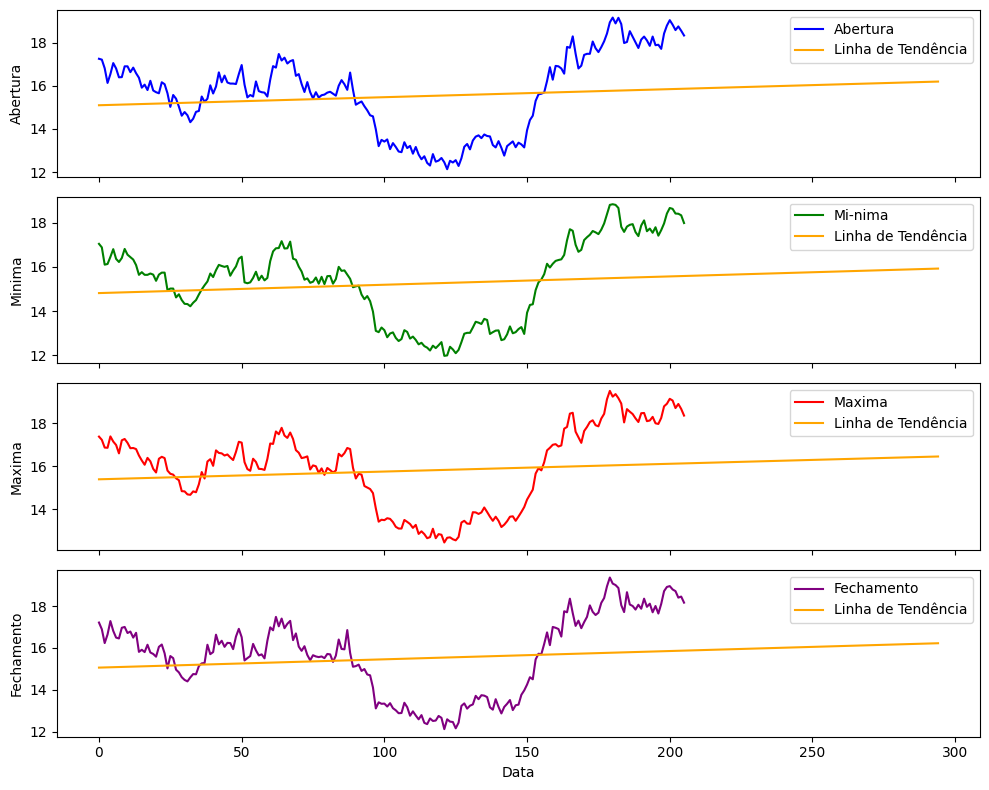

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: CSNA3.SA
Datas entre: 2024-01-01 e 2024-10-23


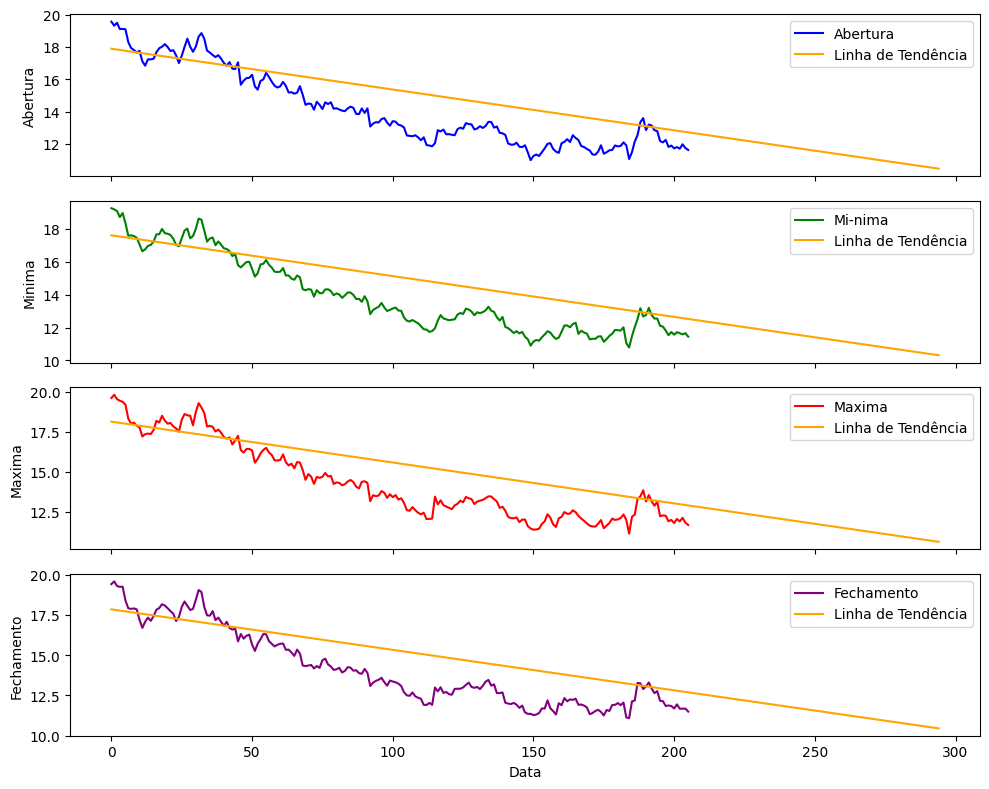

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: SUZB3.SA
Datas entre: 2024-01-01 e 2024-10-23


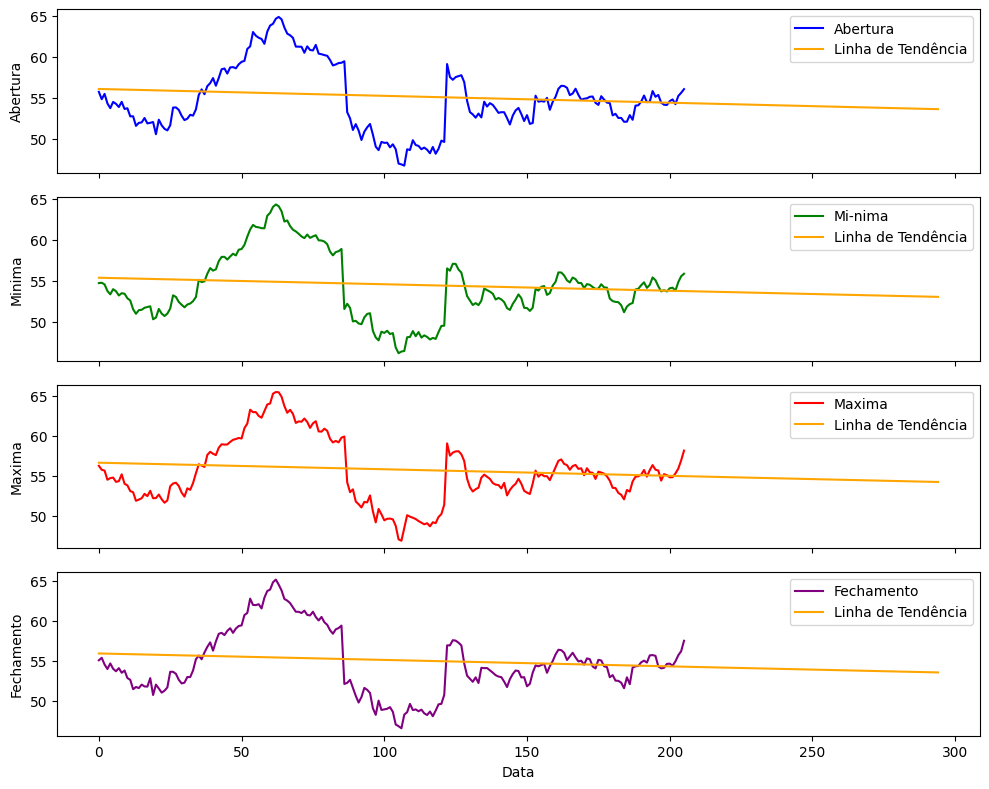

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: HAPV3.SA
Datas entre: 2024-01-01 e 2024-10-23


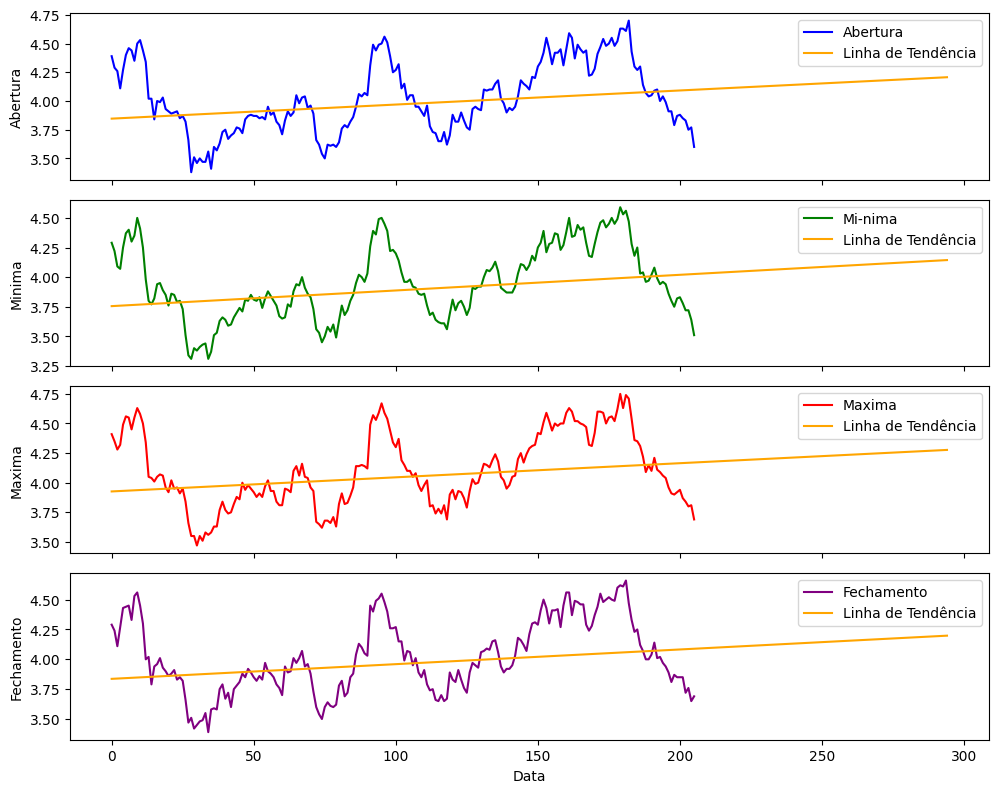

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: KLBN11.SA
Datas entre: 2024-01-01 e 2024-10-23


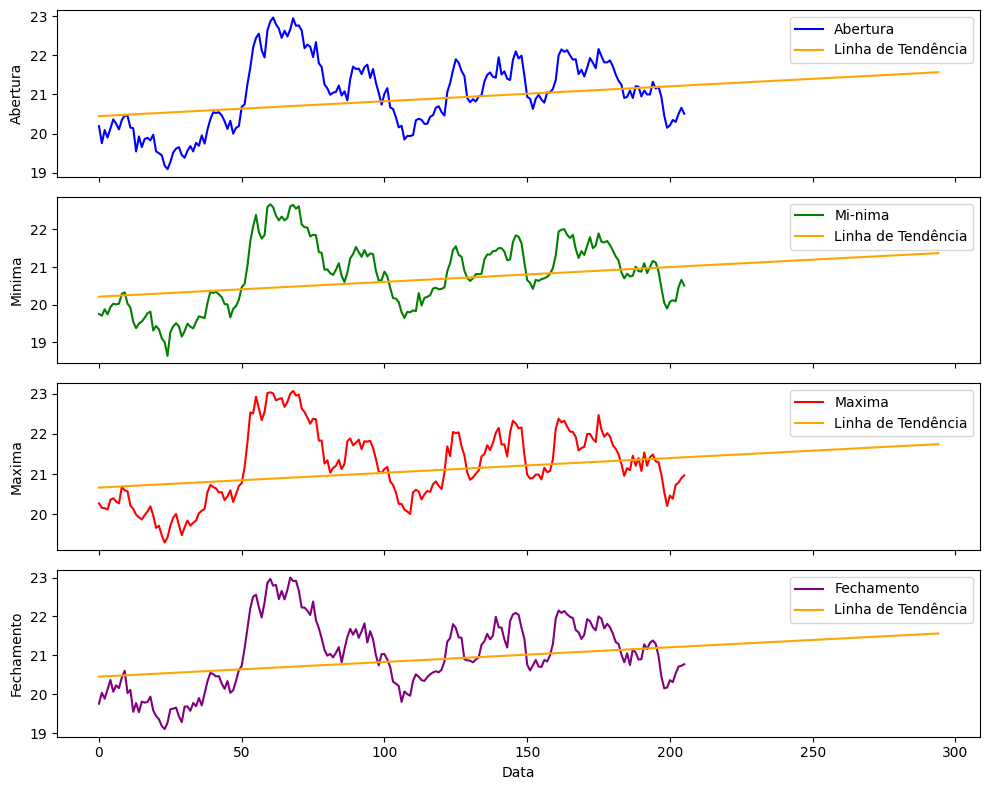

[*********************100%***********************]  1 of 1 completed

******************************************************************
******************************************************************
Ação: RADL3.SA
Datas entre: 2024-01-01 e 2024-10-23


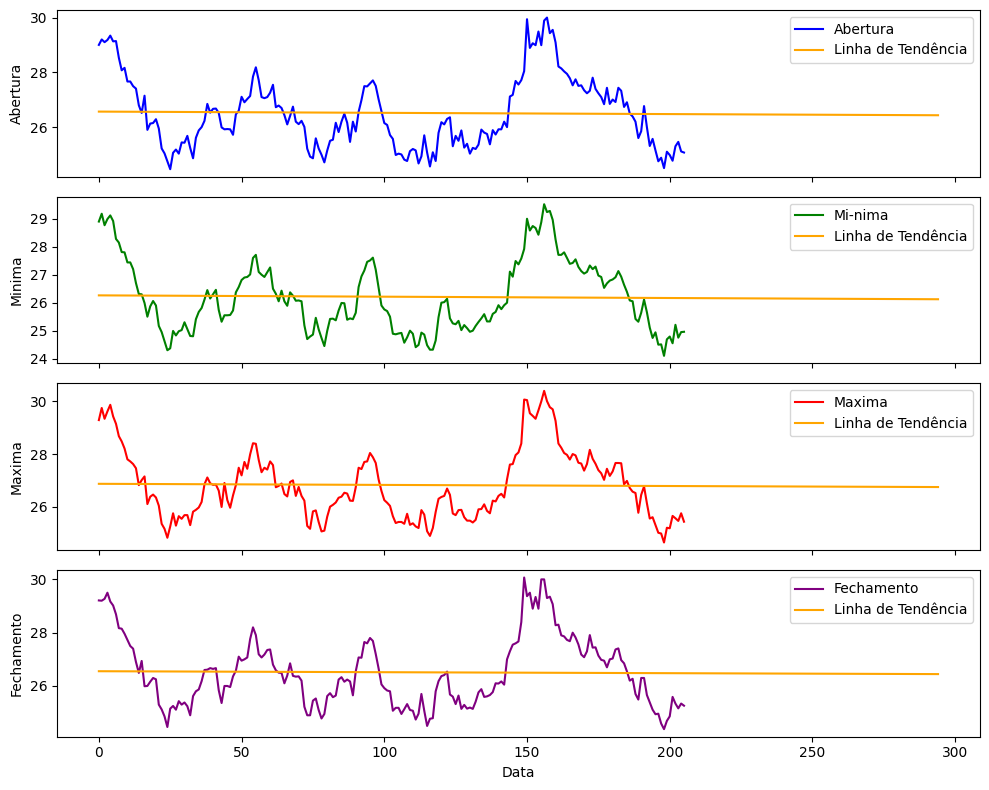

******************************************************************


In [101]:
print(dados)

Price                       Date  Adj Close      Close       High        Low  \
Ticker                             VALE3.SA   VALE3.SA   VALE3.SA   VALE3.SA   
0      2019-10-23 00:00:00+00:00  29.675205  47.110001  47.830002  47.029999   
1      2019-10-24 00:00:00+00:00  29.448433  46.750000  47.570000  46.520000   
2      2019-10-25 00:00:00+00:00  30.588575  48.560001  48.560001  47.549999   
3      2019-10-28 00:00:00+00:00  30.676765  48.700001  48.799999  48.340000   
4      2019-10-29 00:00:00+00:00  30.645267  48.650002  48.799999  48.080002   
...                          ...        ...        ...        ...        ...   
1239   2024-10-16 00:00:00+00:00  62.340000  62.340000  62.380001  61.580002   
1240   2024-10-17 00:00:00+00:00  60.759998  60.759998  61.320000  60.639999   
1241   2024-10-18 00:00:00+00:00  60.549999  60.549999  61.470001  60.459999   
1242   2024-10-21 00:00:00+00:00  60.330002  60.330002  61.380001  60.270000   
1243   2024-10-22 00:00:00+00:00  60.410